# Description

TODO

# Modules loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from clustermatch import conf

# Settings

In [2]:
INPUT_FILENAME_TEMPLATE = "time_test-ccc_p_s"

# Paths

In [3]:
assert (
    conf.MANUSCRIPT["BASE_DIR"] is not None and conf.MANUSCRIPT["BASE_DIR"].exists()
), "Manuscript dir not set"

In [4]:
OUTPUT_FIGURE_DIR = (
    conf.MANUSCRIPT["FIGURES_DIR"] / "coefs_comp" / "time_test"
)
OUTPUT_FIGURE_DIR.mkdir(parents=True, exist_ok=True)
display(OUTPUT_FIGURE_DIR)

PosixPath('/opt/manuscript/content/images/coefs_comp/time_test')

In [5]:
INPUT_DIR = (
    conf.RESULTS_DIR / "time_test"
)
display(INPUT_DIR)

PosixPath('/opt/data/results/time_test')

# Load results

In [6]:
time_results = pd.read_pickle(INPUT_DIR / f"{INPUT_FILENAME_TEMPLATE}.pkl")

In [7]:
time_results.shape

(210, 4)

In [8]:
time_results.head()

,data_size,method,time,sim
0,100,p,0.000824,-0.066107
1,100,p,0.000433,-0.115117
2,100,p,0.000494,-0.050567
3,100,p,0.000284,0.215785
4,100,p,0.000248,0.020045


# Processing

In [9]:
time_results = time_results.replace(
    {
        "method": {
            "p": "Pearson",
            "s": "Spearman",
            "cm": "CCC",
            "mic": "MIC",
        }
    }
)

In [10]:
time_results.shape

(210, 4)

In [11]:
time_results.head()

,data_size,method,time,sim
0,100,Pearson,0.000824,-0.066107
1,100,Pearson,0.000433,-0.115117
2,100,Pearson,0.000494,-0.050567
3,100,Pearson,0.000284,0.215785
4,100,Pearson,0.000248,0.020045


In [12]:
time_results.groupby(["data_size", "method"])["time"].describe()

count       mean       std        min        25%  \
data_size method                                                       
100       CCC        10.0   0.021479  0.056003   0.003410   0.003717   
          Pearson    10.0   0.000361  0.000189   0.000166   0.000254   
          Spearman   10.0   0.001643  0.000689   0.000819   0.001099   
500       CCC        10.0   0.008128  0.001000   0.007262   0.007491   
          Pearson    10.0   0.000121  0.000036   0.000093   0.000095   
          Spearman   10.0   0.000768  0.000127   0.000686   0.000689   
1000      CCC        10.0   0.011695  0.001009   0.010720   0.010854   
          Pearson    10.0   0.000143  0.000024   0.000092   0.000134   
          Spearman   10.0   0.000904  0.000266   0.000716   0.000720   
5000      CCC        10.0   0.047750  0.004024   0.042189   0.043563   
          Pearson    10.0   0.000127  0.000045   0.000101   0.000102   
          Spearman   10.0   0.001208  0.000109   0.001105   0.001124   
10000     CCC        10.0   0.100912  0.009143   0.087460   0.097435   
          Pearson    10.0   0.000158  0.000036   0.000125   0.000134   
          Spearman   10.0   0.002388  0.000108   0.002227   0.002303   
100000    CCC        10.0   1.106167  0.073614   1.026618   1.054651   
          Pearson    10.0   0.001521  0.000243   0.001315   0.001342   
          Spearman   10.0   0.029060  0.002711   0.025162   0.028210   
1000000   CCC        10.0  13.359596  0.449312  12.391216  13.150147   
          Pearson    10.0   0.014881  0.001366   0.013062   0.013667   
          Spearman   10.0   0.381825  0.022766   0.354489   0.365370   

                          50%        75%        max  
data_size method                                     
100       CCC        0.003795   0.003904   0.180865  
          Pearson    0.000286   0.000413   0.000824  
          Spearman   0.001508   0.002136   0.002830  
500       CCC        0.007801   0.008234   0.010565  
          Pearson    0.000099   0.000148   0.000193  
          Spearman   0.000702   0.000781   0.001057  
1000      CCC        0.011662   0.012069   0.013989  
          Pearson    0.000142   0.000156   0.000185  
          Spearman   0.000809   0.000975   0.001571  
5000      CCC        0.049462   0.051099   0.052273  
          Pearson    0.000103   0.000132   0.000240  
          Spearman   0.001186   0.001239   0.001441  
10000     CCC        0.101225   0.105010   0.117794  
          Pearson    0.000149   0.000158   0.000236  
          Spearman   0.002371   0.002471   0.002571  
100000    CCC        1.082907   1.126543   1.241909  
          Pearson    0.001441   0.001638   0.002097  
          Spearman   0.028706   0.030770   0.033448  
1000000   CCC       13.425279  13.625976  13.931165  
          Pearson    0.014961   0.015683   0.017308  
          Spearman   0.373809   0.394252   0.422251

# Plot

In [13]:
hue_order = ["CCC", "Pearson", "Spearman"]

In [14]:
deep_colors = sns.color_palette("deep")
display(deep_colors)

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [15]:
colors = {
    "CCC": deep_colors[0],
    "Pearson": deep_colors[1],
    "Spearman": deep_colors[2],
}

In [16]:
plot_data = time_results[time_results["data_size"] >= 1000]

In [17]:
plot_data = plot_data.assign(
    data_size=plot_data["data_size"].apply(lambda x: f"{int(x/1000)}k" if x < 1000000 else f"{int(x/1000000)}m")
)

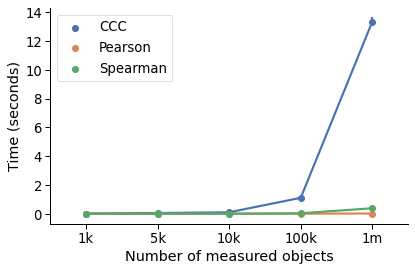

In [18]:
with sns.plotting_context('paper', font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x='data_size',
        y='time',
        hue='method',
        hue_order=hue_order,
        palette=colors,
        legend=False
    )
    sns.despine()
    plt.legend(loc='best')
    plt.xlabel('Number of measured objects')
    plt.ylabel('Time (seconds)')
    plt.tight_layout()
    plt.savefig(
        OUTPUT_FIGURE_DIR / f'{INPUT_FILENAME_TEMPLATE}.svg',
        bbox_inches="tight",
        facecolor="white",
    )
    # ax.set_yscale('log')

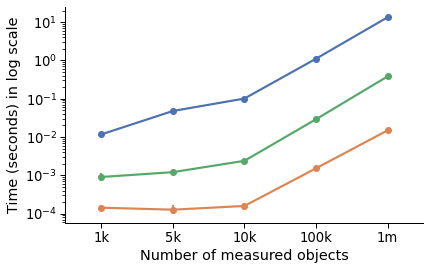

In [19]:
with sns.plotting_context('paper', font_scale=1.5):
    ax = sns.pointplot(
        data=plot_data,
        x='data_size',
        y='time',
        hue='method',
        hue_order=hue_order,
        palette=colors,
        legend=False,
    )
    sns.despine()
    plt.legend([],[], frameon=False)
    plt.xlabel('Number of measured objects')
    plt.ylabel('Time (seconds) in log scale')
    plt.tight_layout()
    plt.savefig(
        OUTPUT_FIGURE_DIR / f'{INPUT_FILENAME_TEMPLATE}-log.svg',
        bbox_inches="tight",
        facecolor="white",
    )
    ax.set_yscale('log')